<a href="https://colab.research.google.com/github/gabrieladamasceno/Attacks_5G/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Acessar dataset
drive.mount('/content/gdrive')

# Carregar o dataset
encoded = pd.read_csv("/content/gdrive/MyDrive/Datasets/Attacks/Encoded/Encoded.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
'''
# Verificar valores nulos
print(encoded.isnull().sum())

# Verificar valores infinitos
print(np.isinf(encoded).sum())

# Selecionar apenas colunas numéricas
numeric_cols = encoded.select_dtypes(include=[np.number]).columns.tolist()

# Verificar valores infinitos apenas nas colunas numéricas
infinite_counts = np.isinf(encoded[numeric_cols]).sum()
print(infinite_counts)

encoded.fillna(0, inplace=True)

# Verificar se ainda há valores NaN
nan_columns = encoded.isna().any()
print("Colunas com valores NaN ainda:", encoded.columns[nan_columns].tolist())
'''

'\n# Verificar valores nulos\nprint(encoded.isnull().sum())\n\n# Verificar valores infinitos\nprint(np.isinf(encoded).sum())\n\n# Selecionar apenas colunas numéricas\nnumeric_cols = encoded.select_dtypes(include=[np.number]).columns.tolist()\n\n# Verificar valores infinitos apenas nas colunas numéricas\ninfinite_counts = np.isinf(encoded[numeric_cols]).sum()\nprint(infinite_counts)\n\nencoded.fillna(0, inplace=True)\n\n# Verificar se ainda há valores NaN\nnan_columns = encoded.isna().any()\nprint("Colunas com valores NaN ainda:", encoded.columns[nan_columns].tolist())\n'

In [55]:
# Usando shape
num_amostras = encoded.shape[0]
print(f"Número de amostras: {num_amostras}")

# Usando len()
num_amostras_len = len(encoded)
print(f"Número de amostras (usando len): {num_amostras_len}")

Número de amostras: 1215890
Número de amostras (usando len): 1215890


In [56]:
# Exibir os nomes de todas as colunas
colunas = encoded.columns.tolist()  # Converte o Index em uma lista
print("Nomes das colunas:")
for coluna in colunas:
    print(coluna)

Nomes das colunas:
Unnamed: 0
Seq
Dur
RunTime
Mean
Sum
Min
Max
sTos
dTos
sTtl
dTtl
sHops
dHops
TotPkts
SrcPkts
DstPkts
TotBytes
SrcBytes
DstBytes
Offset
sMeanPktSz
dMeanPktSz
Load
SrcLoad
DstLoad
Loss
SrcLoss
DstLoss
pLoss
SrcGap
DstGap
Rate
SrcRate
DstRate
SrcWin
DstWin
sVid
dVid
SrcTCPBase
DstTCPBase
TcpRtt
SynAck
AckDat
Label
Attack Type
Attack Tool
 *        
 *    V   
 *    f   
 e        
 e    f   
 e &      
 e *      
 e d      
 e g      
 e i      
 e r      
 e s      
 eU       
e        
arp
icmp
ipv6-icmp
llc
lldp
sctp
tcp
udp
ACC
CON
ECO
FIN
INT
NRS
REQ
RSP
RST
TST
URP
Shutdown
Start
Status
39
4
52
54
af11
af12
af41
cs0
cs4
cs6
cs7
ef
nan


In [57]:
# Selecionar apenas colunas numéricas
numeric_cols = encoded.select_dtypes(include=['number']).columns

# Aplicar a suavização apenas nas colunas numéricas
for col in numeric_cols:
    encoded[col] = encoded[col].fillna(encoded[col].mean())

In [58]:
# columns with null values

columns_null = []
columns = encoded.columns
for column in columns:
    c = encoded[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

## Features
* Seq: Sequência de pacotes.
* Offset: Deslocamento em bytes.
* sTtl: Time to Live da fonte.
* tcp: Indica se o protocolo TCP está sendo usado.
* AckDat: Dados de reconhecimento.
* RST: Sinalizador de reinício TCP.
* INT: Interrupções no fluxo de dados.
* TcpRtt: Tempo de ida e volta do TCP.
* icmp: Indica se o protocolo ICMP está presente.
* sMeanPktSz: Tamanho médio do pacote da fonte.
* FIN: Sinalizador de finalização de conexão.
* sHops: Número de saltos até o destino.
* Mean: Valor médio de um conjunto de dados.
* dTtl: Time to Live do destino.
* SrcBytes: Bytes enviados da fonte.
* TotBytes: Total de bytes.
* dMeanPktSz: Tamanho médio do pacote do destino.
* Status: Estado da conexão.
* cs0: Parâmetro de controle.
* SrcWin: Janela de origem TCP.
* sTos: Tipo de serviço.
* CON: Conexões.
* REQ: Requisições.
* Loss: Taxa de perda de pacotes.

In [59]:
# Verificar o tipo da coluna 'Label'
# tipo_coluna = encoded['e        '].dtype
# print(f"O tipo da coluna 'e' é: {tipo_coluna}")

In [60]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers import Adam


# Definir as features que você deseja usar
features = [
    'Seq', 'Offset', 'sTtl', 'e        ', 'tcp', 'AckDat', 'RST', 'INT', 'TcpRtt', 'icmp',
    'sMeanPktSz', 'FIN', 'sHops', 'Mean', 'dTtl', 'SrcBytes', 'TotBytes',
    'dMeanPktSz', 'Status', 'cs0', 'SrcWin', 'sTos', 'CON', 'REQ', 'Loss'
]

# Separar as features e os rótulos
X = encoded[features]  # Usar apenas as colunas selecionadas
y = encoded['Label'].values

# Codificar os rótulos para valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Transforma 'Benign' e 'Malign' em 0 e 1

# Identificar colunas categóricas (se houver)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Aplicar OneHotEncoder nas colunas categóricas
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # Codificar colunas categóricas
    ],
    remainder='passthrough'  # Manter as colunas numéricas
)

X = transformer.fit_transform(X)  # Transformar as features

# Normalização
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
#pip install optuna

In [63]:
'''
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

# Treinar o modelo usando o Optuna

# Função objetivo para otimizar com Optuna
def objective(trial):
    # Definindo hiperparâmetros
    n_layers = trial.suggest_int('n_layers', 1, 3)  # Número de camadas ocultas
    units = trial.suggest_int('units', 32, 128)     # Número de neurônios por camada
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2) # Taxa de aprendizado

    # Criar o modelo MLP
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(n_layers):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Saída para classificação binária

    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    # Treinar o modelo
    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

    # Avaliar o desempenho
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Executar a otimização com Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", study.best_params)
'''

'\nimport optuna\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.layers import Input, Dense\nfrom sklearn.model_selection import train_test_split\n\n# Treinar o modelo usando o Optuna\n\n# Função objetivo para otimizar com Optuna\ndef objective(trial):\n    # Definindo hiperparâmetros\n    n_layers = trial.suggest_int(\'n_layers\', 1, 3)  # Número de camadas ocultas\n    units = trial.suggest_int(\'units\', 32, 128)     # Número de neurônios por camada\n    lr = trial.suggest_loguniform(\'lr\', 1e-5, 1e-2) # Taxa de aprendizado\n\n    # Criar o modelo MLP\n    model = Sequential()\n    model.add(Dense(units, activation=\'relu\', input_shape=(X_train.shape[1],)))\n    for _ in range(n_layers):\n        model.add(Dense(units, activation=\'relu\'))\n    model.add(Dense(1, activation=\'sigmoid\'))  # Saída para classificação binária\n\n    model.compile(optimizer=Adam(learning_rate=lr), loss=\'binary_crossentropy\', metri

In [64]:
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
# Definir a estrutura da MLP Tanh
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(96, activation='tanh')),  # Camada de entrada com 96 neurônios
model.add(Dense(64, activation='tanh')),  # Primeira camada oculta
model.add(Dense(64, activation='tanh')),  # Segunda camada oculta
model.add(Dense(64, activation='tanh')),  # Terceira camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída para classificação binária

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001, clipnorm=1.0), loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))
'''


"\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay\nfrom sklearn.neural_network import MLPClassifier\n# Definir a estrutura da MLP Tanh\nmodel = Sequential()\nmodel.add(Input(shape=(X_train.shape[1],)))\nmodel.add(Dense(96, activation='tanh')),  # Camada de entrada com 96 neurônios\nmodel.add(Dense(64, activation='tanh')),  # Primeira camada oculta\nmodel.add(Dense(64, activation='tanh')),  # Segunda camada oculta\nmodel.add(Dense(64, activation='tanh')),  # Terceira camada oculta\nmodel.add(Dense(1, activation='sigmoid'))  # Camada de saída para classificação binária\n\n# Compilar o modelo\nmodel.compile(optimizer=Adam(learning_rate=0.0001, clipnorm=1.0), loss='binary_crossentropy', metrics=['accuracy'])\n\n# Treinar o modelo\nhistory = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))\n"

In [65]:
'''y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malign"])
disp.plot(cmap='Blues')'''

'y_pred = model.predict(X_test)\ny_pred_classes = (y_pred > 0.5).astype(int)\n\n\ncm = confusion_matrix(y_test, y_pred_classes)\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malign"])\ndisp.plot(cmap=\'Blues\')'

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
# Definir a estrutura da MLP Relu
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(96, activation='relu')),  # Camada de entrada com 96 neurônios
model.add(Dense(64, activation='relu')),  # Primeira camada oculta
model.add(Dense(64, activation='relu')),  # Segunda camada oculta
model.add(Dense(64, activation='relu')),  # Terceira camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída para classificação binária

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001, clipnorm=1.0), loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/5
9728/9728 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9804 - loss: 0.0759 - val_accuracy: 0.9987 - val_loss: 0.0046
Epoch 2/5
9728/9728 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 0.9992 - val_loss: 0.0026
Epoch 3/5
9728/9728 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 4/5
9728/9728 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 5/5
9728/9728 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9995 - val_loss: 0.0015


7600/7600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


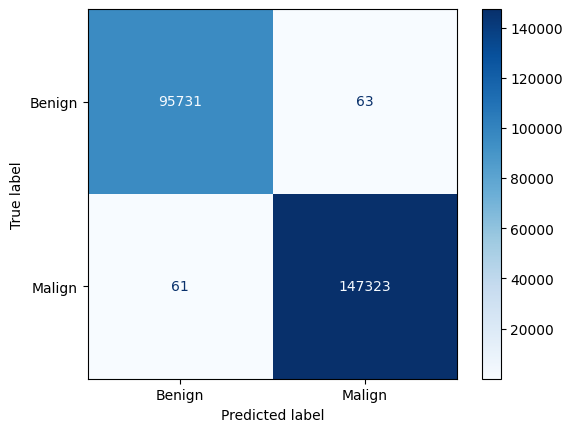

In [70]:
#Matriz de Confusão

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malign"])
disp.plot(cmap='Blues')

In [68]:
#Maligno
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_classes, pos_label=1)
recall = recall_score(y_test, y_pred_classes, pos_label=1)
f1 = f1_score(y_test, y_pred_classes, pos_label=1)

print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precisão: 0.9995725509885607
Recall: 0.9995861151821093
F1 Score: 0.9995793330393188


In [69]:
#Benigno
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_classes, pos_label=0)
recall = recall_score(y_test, y_pred_classes, pos_label=0)
f1 = f1_score(y_test, y_pred_classes, pos_label=0)

print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precisão: 0.9993632036078169
Recall: 0.9993423387686077
F1 Score: 0.9993527710793064
